## 📘 Introduction

Academic performance is influenced by a wide range of factors beyond just classroom instruction. In recent years, increasing attention has been given to the role of psychophysical well-being—how habits like sleep, diet, exercise, and mental health contribute to students' success.

This project investigates the impact of various lifestyle and wellness habits on exam performance using a dataset of student behaviors. The goal is to identify which personal factors are most closely associated with academic achievement, and to what extent they help predict final exam scores.

Through data preprocessing, exploratory analysis, and predictive modeling (using both linear regression and random forest algorithms), the project aims to provide insights that could inform both students and educators about the importance of healthy habits in the learning process.

Ultimately, this work seeks to answer the question:  
**Can students who take better care of their bodies and minds perform better academically?**


### Uploading the Dataset

This cell allows you to upload a CSV file from your local machine into the Colab environment. Once uploaded, the file will be accessible for data processing and analysis in the notebook.


In [1]:
from google.colab import files
uploaded = files.upload()

Saving student_habits_performance.csv to student_habits_performance.csv


In [2]:
import pandas as pd
df = pd.read_csv("student_habits_performance.csv")
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


**Variables in the dataset**

- `student_id`: Unique identifier for each student  
- `age`: Age of the student  
- `gender`: Student’s gender  
- `study_hours_per_day`: Number of hours spent studying per day  
- `social_media_hours`: Number of hours spent on social media per day  
- `netflix_hours`: Number of hours spent watching Netflix per day  
- `part_time_job`: Categorical indicator of whether the student has a part-time job (Yes/No)  
- `attendance_percentage`: Percentage of classes attended  
- `sleep_hours`: Average number of hours slept per night  
- `diet_quality`: Quality of the student’s diet (e.g., Poor, Fair, Good)  
- `exercise_frequency`: Number of times the student exercises per week  
- `parental_education_level`: Highest education level attained by the student’s parents  
- `internet_quality`: Quality of the student’s internet connection (e.g., Poor, Average, Good)  
- `mental_health_rating`: Self-reported mental health on a numerical scale  
- `extracurricular_participation`: Whether the student participates in extracurricular activities (Yes/No)  
- `exam_score`: Final exam score (numerical)



---



We start our analysis looking for null values

In [3]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [4]:
df.loc[df['parental_education_level'].isnull()]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
10,S1010,19,Female,4.6,3.7,0.8,No,77.6,5.8,Fair,1,NaN,Good,3,No,63.3
33,S1033,18,Female,4.0,0.9,1.1,No,99.5,5.8,Poor,2,NaN,Average,5,No,70.7
47,S1047,23,Female,2.5,2.9,2.7,No,83.5,7.0,Good,4,NaN,Good,8,Yes,59.7
74,S1074,21,Female,2.3,1.0,0.4,No,100.0,6.4,Fair,6,NaN,Good,1,No,66.9
93,S1093,22,Male,4.1,2.5,3.0,No,85.1,5.8,Good,4,NaN,Good,5,No,70.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,S1921,23,Female,4.4,2.7,1.0,No,79.8,6.1,Fair,6,NaN,Average,3,No,85.4
925,S1925,19,Other,1.7,2.9,1.6,Yes,97.3,8.7,Good,1,NaN,Good,7,No,53.6
939,S1939,18,Female,4.7,3.2,1.9,No,75.2,5.4,Good,3,NaN,Good,6,No,71.0
945,S1945,23,Male,6.0,2.9,2.1,Yes,98.9,6.4,Poor,0,NaN,Average,7,No,100.0


In [5]:
# we create a new dataframe with the records which have a null value and remove them from the dataset
delete1 = df["parental_education_level"].isna()
df = df.drop(index=df[delete1].index)

In [6]:
# quick check
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [7]:
df.shape

(909, 16)

We now remain with 909 records.

### Creating a Screentime Feature

This cell creates a new feature called `screentime_hours` by summing the time spent on social media and Netflix. The original columns (`social_media_hours` and `netflix_hours`) are then removed to keep the dataset clean and avoid redundancy.


In [8]:
df['screentime_hours'] = df['social_media_hours'] + df['netflix_hours']
df.drop(columns=['social_media_hours', 'netflix_hours'], inplace=True)

### Encoding Diet Quality

This cell performs ordinal encoding on the `diet_quality` column. The categories are mapped to numerical values reflecting their order: `Poor` = 0, `Fair` = 1, and `Good` = 2. This transformation allows the feature to be used in numerical analyses and machine learning models.


In [17]:
diet_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2
}

df['diet_quality_encoded'] = df['diet_quality'].map(diet_mapping)

In [18]:
# Computing descriptive statistics
df.describe()

,age,study_hours_per_day,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,screentime_hours,diet_quality_encoded
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,83.880308,6.474037,3.051705,5.466447,69.558196,4.334983,1.199120
std,2.302721,1.469730,9.453622,1.218943,2.035632,2.857525,16.929436,1.591839,0.724766
min,17.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000,0.200000,0.000000
25%,18.000000,2.500000,77.500000,5.600000,1.000000,3.000000,58.400000,3.300000,1.000000
50%,20.000000,3.500000,84.200000,6.500000,3.000000,5.000000,70.400000,4.400000,1.000000
75%,22.000000,4.500000,90.700000,7.300000,5.000000,8.000000,81.300000,5.400000,2.000000
max,24.000000,8.300000,100.000000,10.000000,6.000000,10.000000,100.000000,10.100000,2.000000


## 📊 Data Overview

- **Age** ranges from 17 to 24 years, with an average of ~20.5.
- **Study hours per day** vary widely (0 to 8.3 hours), with a median of 3.5 hours.
- **Attendance percentage** is generally high, with most students attending more than 80% of classes.
- **Sleep hours** average around 6.5 per night, with some students sleeping as little as 3.2 hours or as much as 10.
- **Exercise frequency** ranges from 0 to 6 days per week, with a median of 3.
- **Mental health rating** (scale 1–10) shows wide variability, with a median of 5.
- **Screentime hours** average ~4.3 hours per day, with some students reporting over 10 hours.
- **Diet quality** is encoded as ordinal values (0 = Poor, 1 = Fair, 2 = Good), with most students falling into the Fair category.
- **Exam scores** range from 18.4 to 100, with a mean of ~69.6.

These distributions suggest a diverse group of students with differing habits and wellness profiles, providing a strong foundation for exploring how lifestyle factors impact academic performance.


### Exam Score by Diet Quality (Boxplot)

We now draw a boxplot to visualize the distribution of `exam_score` across different levels of `diet_quality`. The x-axis shows the encoded diet quality (`0 = Poor`, `1 = Fair`, `2 = Good`), and the y-axis represents exam scores. The plot helps to visually assess whether students with better diets tend to achieve higher scores. Outliers are displayed as individual points, and the box represents the interquartile range (IQR) for each group.


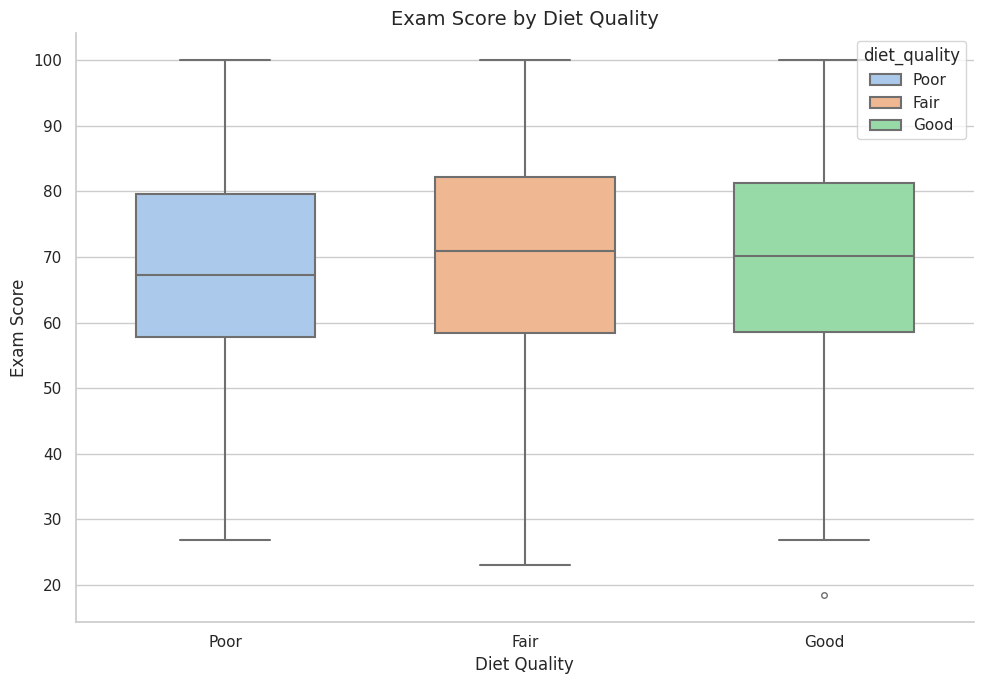

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stile estetico
sns.set(style="whitegrid", palette="pastel")

# Etichette leggibili per la x (0 = Poor, 1 = Fair, 2 = Good)
labels = ['Poor', 'Fair', 'Good']

# Plot
plt.figure(figsize=(10, 7))
ax = sns.boxplot(
    x='diet_quality_encoded',
    y='exam_score',
    data=df,
    width=0.6,
    linewidth=1.5,
    fliersize=4,
    hue = df['diet_quality']
)

# Etichette e titolo
ax.set_xlabel('Diet Quality', fontsize=12)
ax.set_ylabel('Exam Score', fontsize=12)
ax.set_title('Exam Score by Diet Quality', fontsize=14)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(labels)

# Rimuove bordi superflui
sns.despine()
plt.tight_layout()
plt.show()

The boxplot shows how students' exam scores vary based on their self-reported diet quality. While the differences are not dramatic, students with a "Fair" or "Good" diet tend to have slightly higher median exam scores compared to those with a "Poor" diet. Additionally, the range of scores is similar across all three groups, suggesting that diet quality alone may not strongly differentiate academic performance, but it may play a supportive role in better outcomes when combined with other healthy habits.




---



This 2x2 grid of scatterplots explores the relationship between various psychophysical well-being factors and students' exam scores:

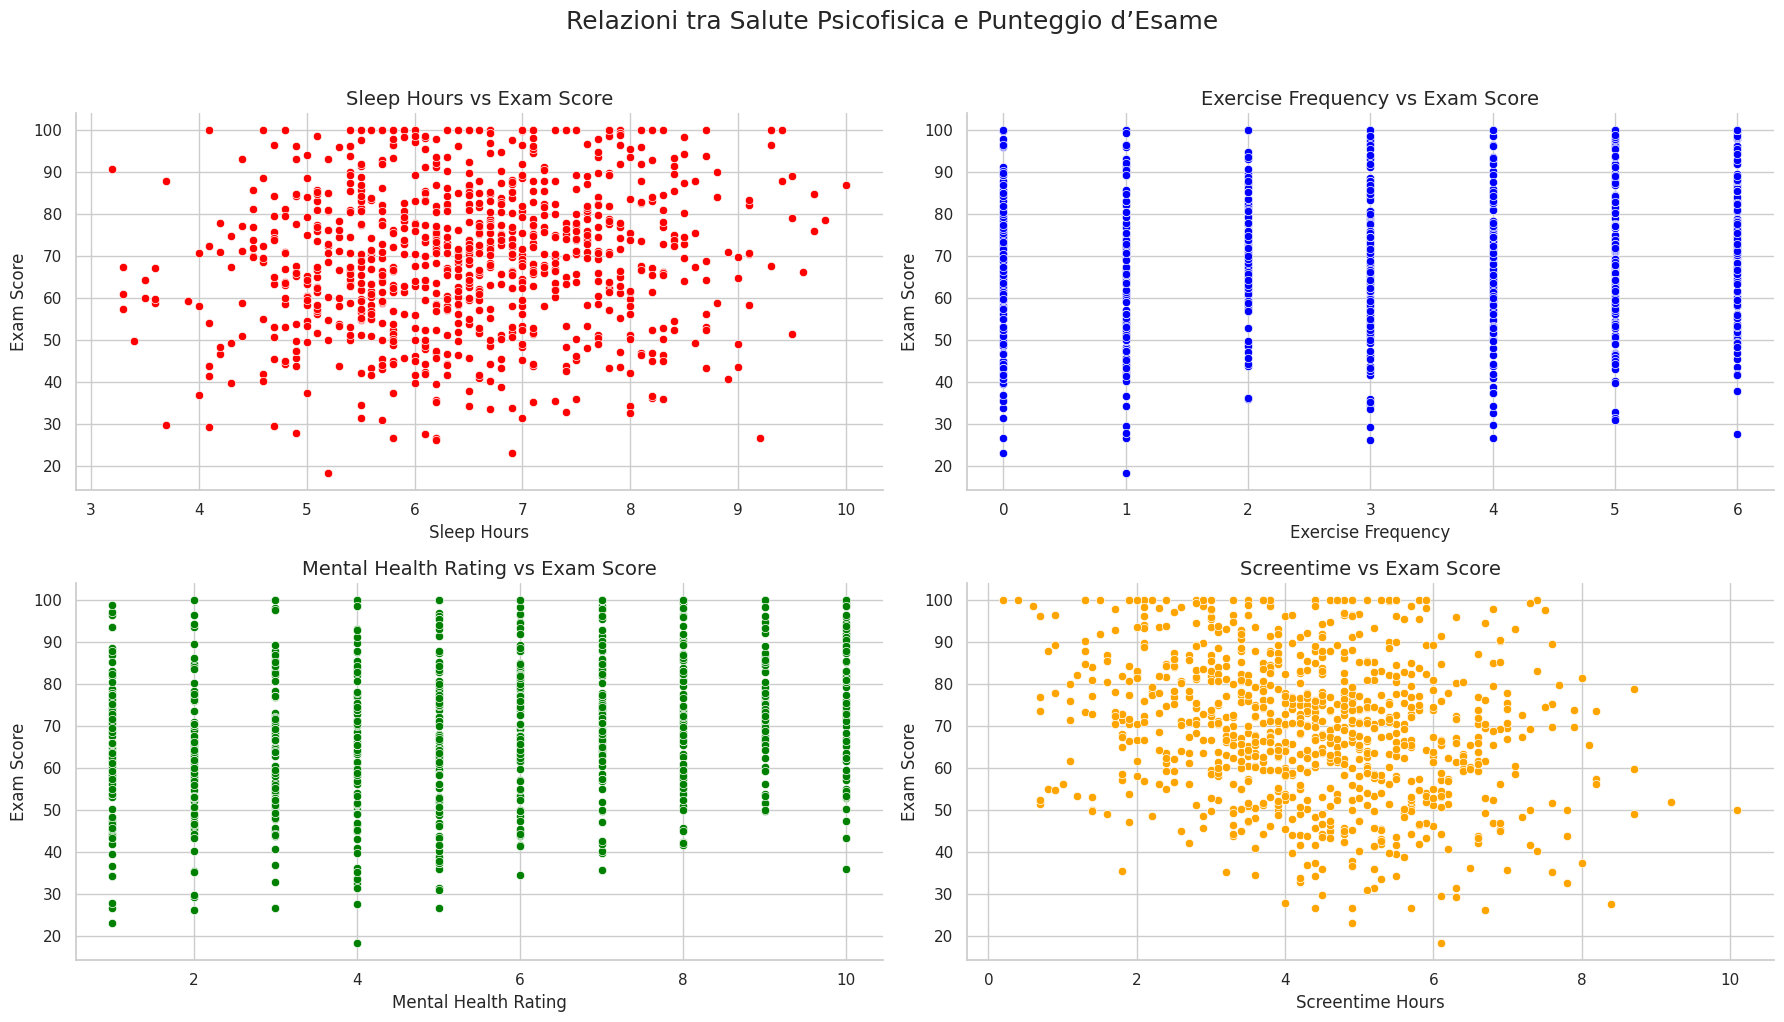

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Imposta lo stile generale
sns.set(style="whitegrid", palette="deep")

# Crea la griglia 2x2
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Relazioni tra Salute Psicofisica e Punteggio d’Esame', fontsize=18, y=1.02)

# 1. Sonno
sns.scatterplot(x='sleep_hours', y='exam_score', data=df, ax=axes[0, 0], color='red')
axes[0, 0].set_title('Sleep Hours vs Exam Score', fontsize=14)
axes[0, 0].set_xlabel('Sleep Hours', fontsize=12)
axes[0, 0].set_ylabel('Exam Score', fontsize=12)

# 2. Esercizio
sns.scatterplot(x='exercise_frequency', y='exam_score', data=df, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Exercise Frequency vs Exam Score', fontsize=14)
axes[0, 1].set_xlabel('Exercise Frequency', fontsize=12)
axes[0, 1].set_ylabel('Exam Score', fontsize=12)

# 3. Salute mentale
sns.scatterplot(x='mental_health_rating', y='exam_score', data=df, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Mental Health Rating vs Exam Score', fontsize=14)
axes[1, 0].set_xlabel('Mental Health Rating', fontsize=12)
axes[1, 0].set_ylabel('Exam Score', fontsize=12)

# 4. Screentime
sns.scatterplot(x='screentime_hours', y='exam_score', data=df, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Screentime vs Exam Score', fontsize=14)
axes[1, 1].set_xlabel('Screentime Hours', fontsize=12)
axes[1, 1].set_ylabel('Exam Score', fontsize=12)

# Layout ordinato
plt.tight_layout()
sns.despine()
plt.show()


### Interpretation: Relationships Between Psychophysical Health and Exam Score

This 2x2 grid of scatterplots explores how various aspects of students' psychophysical health relate to their academic performance.

- **Sleep Hours vs Exam Score**: No clear trend is observed. Exam scores appear widely distributed across all sleep durations, suggesting that sleep alone may not be a strong predictor of academic performance in this dataset.

- **Exercise Frequency vs Exam Score**: The data points are vertically clustered by integer values of exercise frequency. While there is no strong linear pattern, students who exercise more frequently may have slightly higher average scores.

- **Mental Health Rating vs Exam Score**: A slight upward trend is noticeable. Students with higher self-reported mental health tend to perform better, indicating a potential positive association between emotional well-being and academic success.

- **Screentime vs Exam Score**: A mild negative relationship is visible. Higher screentime hours are loosely associated with lower exam scores, supporting the hypothesis that excessive screen use may impact academic performance.

Together, these plots suggest that mental health and screentime habits may play more significant roles in influencing student performance than sleep or exercise alone.




---



We now develop a correlation matrix to visualize the Pearson correlation coefficients between key variables related to students' habits and their academic performance.


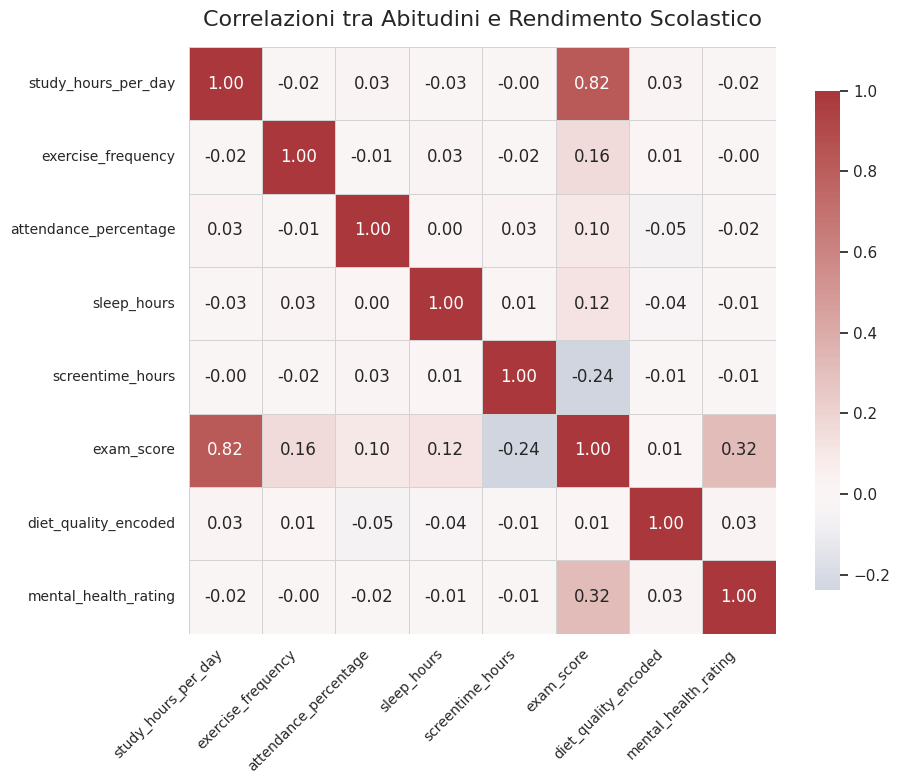

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleziona solo variabili numeriche di interesse
df_numeric = df[[
    "study_hours_per_day",
    "exercise_frequency",
    "attendance_percentage",
    "sleep_hours",
    "screentime_hours",
    "exam_score",
    "diet_quality_encoded",
    "mental_health_rating"
]]

# Rimuove eventuali valori nulli
df_clean_numeric = df_numeric.dropna()

# Calcola matrice di correlazione
correlation_matrix = df_clean_numeric.corr()

# Heatmap migliorata
plt.figure(figsize=(10, 8))
sns.set(style="white")

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='vlag',
    fmt='.2f',
    linewidths=0.5,
    linecolor='lightgrey',
    center=0,
    square=True,
    cbar_kws={"shrink": 0.85}
)

plt.title('Correlazioni tra Abitudini e Rendimento Scolastico', fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


### Interpretation: Correlation Matrix Between Habits and Academic Performance

This correlation matrix reveals how different student habits and well-being indicators relate to each other and to exam performance.

- The strongest positive correlation with `exam_score` is observed for `study_hours_per_day` (**r = 0.82**), suggesting that time spent studying is a major driver of academic success.
- `Mental_health_rating` also shows a moderate positive correlation (**r = 0.32**), supporting the idea that better psychological well-being is associated with higher academic performance.
- `Screentime_hours` displays a modest negative correlation (**r = -0.24**) with exam scores, indicating that more screen usage may hinder performance.
- Other variables, such as `sleep_hours`, `exercise_frequency`, and `diet_quality_encoded`, show very weak or negligible correlations, suggesting they may play a minor or indirect role.

Overall, the matrix highlights that while study habits and mental health are key predictors of exam results, other lifestyle factors contribute less directly in this dataset.




---



# Linear Regression

### Preparing Features and Target for Linear Regression

In this cell, a set of psychophysical and behavioral features is selected to predict students' exam scores. The selected features include study hours, mental health rating, screentime, exercise frequency, sleep hours, and encoded diet quality. The target variable (`y`) is the `exam_score`. Any rows containing missing values are removed to ensure the model is trained on complete data only.


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Seleziona le feature rilevanti
features = [
    'study_hours_per_day',
    'mental_health_rating',
    'screentime_hours',
    'exercise_frequency',
    'sleep_hours',
    'diet_quality_encoded'
]

# X = variabili indipendenti, y = variabile target
X = df[features]
y = df['exam_score']

# Rimuovi eventuali valori nulli
X = X.dropna()
y = y.loc[X.index]


### Training a Linear Regression Model

The dataset is split into training and testing sets, with 80% of the data used to train the model and 20% reserved for testing. A `LinearRegression` model is then instantiated and trained on the training data. Finally, predictions are made on the test set to evaluate how well the model generalizes to unseen data.


In [40]:
# Suddividi il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Istanzia e allena il modello
model = LinearRegression()
model.fit(X_train, y_train)

# Fai le predizioni
y_pred = model.predict(X_test)


### Evaluating the Linear Regression Model

This cell calculates three key evaluation metrics for the linear regression model:
- **MAE (Mean Absolute Error)**: the average absolute difference between predicted and actual exam scores.
- **RMSE (Root Mean Squared Error)**: gives more weight to large errors and indicates overall prediction accuracy.
- **R² (R-squared)**: represents the proportion of variance in exam scores explained by the model. A value close to 1 indicates a strong fit.

These metrics help assess how well the model performs on the test data.


In [41]:
# Calcola metriche di errore
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Stampa i risultati
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 4.37
RMSE: 5.46
R²: 0.89


### Interpretation: Linear Regression Performance

The linear regression model achieved the following results on the test set:

- **MAE (Mean Absolute Error): 4.37**  
  On average, the model’s predictions differ from the actual exam scores by about 4.4 points.

- **RMSE (Root Mean Squared Error): 5.46**  
  The typical error is around 5.5 points, slightly higher due to the effect of larger errors.

- **R² (R-squared): 0.89**  
  The model explains 89% of the variance in exam scores, indicating a very strong predictive performance.

These metrics suggest that the model is highly effective at capturing the relationship between psychophysical health factors and academic performance.


### Viewing Linear Regression Coefficients

This cell creates a DataFrame to display the coefficients learned by the linear regression model. The features are sorted by the absolute value of their coefficients, highlighting which variables have the strongest impact on the predicted exam score.

Positive coefficients indicate a direct relationship with performance (e.g., more study hours → higher score), while negative coefficients suggest an inverse relationship (e.g., more screentime → lower score).


In [42]:
# Visualizza i coefficienti del modello
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coefficients)


                Feature  Coefficient
0   study_hours_per_day     9.654126
2      screentime_hours    -2.407401
4           sleep_hours     1.998093
1  mental_health_rating     1.985463
3    exercise_frequency     1.516580
5  diet_quality_encoded    -0.557375


### Interpretation: Linear Regression Coefficients

These coefficients represent the estimated impact of each feature on the predicted exam score, assuming all other variables are held constant:

- **study_hours_per_day (+9.65)**: The strongest positive predictor. Each additional hour of study is associated with nearly a 10-point increase in exam score.
- **screentime_hours (−2.41)**: Negative impact. More screen time is associated with lower exam performance.
- **sleep_hours (+2.00)** and **mental_health_rating (+1.99)**: Both positively influence exam score, suggesting better sleep and mental health contribute to academic success.
- **exercise_frequency (+1.52)**: Slightly positive, indicating that physical activity may support performance.
- **diet_quality_encoded (−0.56)**: Slightly negative, which is unexpected and likely not significant—possibly due to weak correlation in the data.

Overall, study habits and mental health emerge as the most important factors for predicting exam success.



---



This scatterplot compares the actual exam scores (x-axis) with the predicted scores from the linear regression model (y-axis). Each point represents a student.

The red dashed line indicates the ideal scenario where predicted scores perfectly match actual scores. The closer the points are to this line, the more accurate the model's predictions.

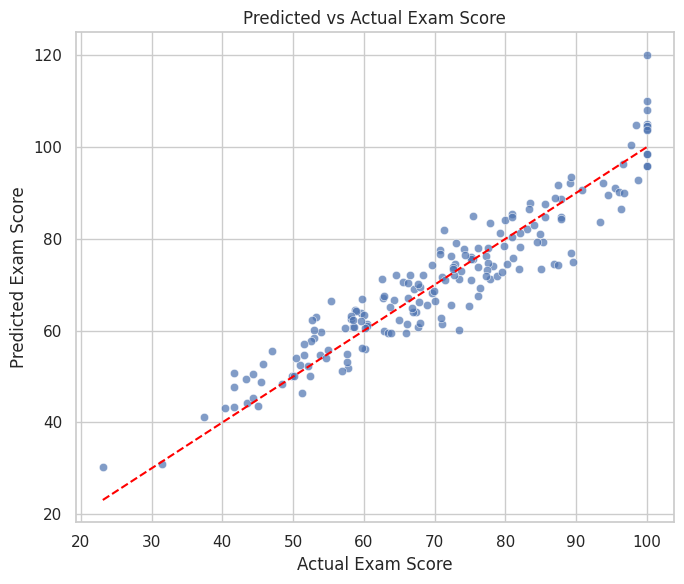

In [54]:
sns.set(style="whitegrid", palette="deep")

plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Predicted vs Actual Exam Score")
plt.tight_layout()
plt.show()

### Interpretation: Predicted vs Actual Exam Scores (Linear Regression)

This scatterplot compares the actual exam scores (x-axis) with the predicted scores generated by the linear regression model (y-axis). Each point represents a student. The red dashed line represents the ideal scenario where predictions perfectly match the actual values (i.e., predicted = actual).

The points are tightly clustered around the diagonal, especially in the mid-range, indicating that the model performs very well in predicting student performance. Some dispersion is observed at the extremes, but overall, the model shows strong generalization and accuracy.




---



We want to draw a barplot that displays the absolute coefficients from the linear regression model, illustrating the relative importance of each feature in predicting exam scores.


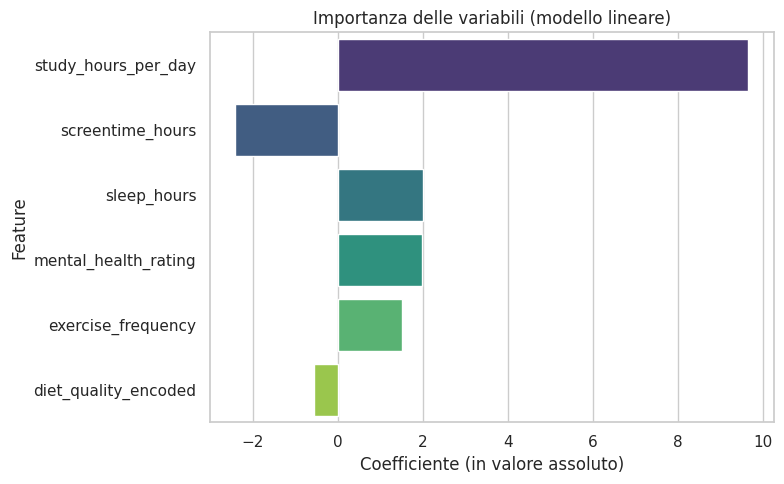

In [53]:
sns.set(style="whitegrid", palette="deep")

plt.figure(figsize=(8, 5))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coefficients,
    hue='Feature',
    dodge=False,
    legend=False,
    palette='viridis'
)
plt.title("Importanza delle variabili (modello lineare)")
plt.xlabel("Coefficiente (in valore assoluto)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### Interpretation: Feature Importance (Linear Regression)

This horizontal bar plot shows the absolute value of each coefficient from the linear regression model, indicating the relative importance of each feature in predicting exam scores.

- **study_hours_per_day** is by far the most influential factor, with a strong positive impact.
- **screentime_hours** has a negative effect, suggesting that more screentime reduces academic performance.
- **sleep_hours**, **mental_health_rating**, and **exercise_frequency** show moderate positive contributions.
- **diet_quality_encoded** has the lowest impact, reinforcing previous findings that diet quality is only weakly correlated with academic outcomes.

These results highlight the dominance of study behavior, while also confirming the supporting role of overall well-being.


### Training a Random Forest Regressor

This cell creates and trains a `RandomForestRegressor` using 100 decision trees (`n_estimators=100`). The model is fit on the same training data used for the linear regression, allowing for a performance comparison between linear and non-linear approaches. Random Forest is capable of capturing complex, non-linear interactions between features.


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Istanzia il modello Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Allena il modello
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Evaluating the Random Forest Model

After training the Random Forest Regressor, predictions are made on the test set. The model's performance is evaluated using the following metrics:

- **MAE (Mean Absolute Error)**: Measures the average absolute difference between predicted and actual exam scores.
- **RMSE (Root Mean Squared Error)**: Emphasizes larger errors and gives an overall sense of prediction accuracy.
- **R² (R-squared)**: Indicates how much variance in the exam scores is explained by the model.

These metrics will later be compared to the results from the linear regression model to determine which approach is more effective.


In [47]:
# Predizioni sul test set
rf_pred = rf_model.predict(X_test)

# Valutazione delle performance
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

# Stampa i risultati
print(f"MAE: {rf_mae:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R²: {rf_r2:.2f}")


MAE: 4.39
RMSE: 5.62
R²: 0.88


### Interpretation: Random Forest Performance

The Random Forest model achieved the following performance metrics:

- **MAE (Mean Absolute Error): 4.39**  
  The average prediction error is about 4.4 exam score points, similar to the linear model.

- **RMSE (Root Mean Squared Error): 5.62**  
  Slightly higher than the linear model, indicating slightly more variance in prediction errors.

- **R² (R-squared): 0.88**  
  The model explains 88% of the variance in exam scores, which is very good and just slightly lower than the linear regression’s 89%.

Overall, the Random Forest performed comparably to the linear model, but did not outperform it. This suggests that the relationship between the selected features and exam scores may be mostly linear in nature.


### Calculating Feature Importance (Random Forest)

This cell computes the importance of each feature based on the trained Random Forest model. Feature importance in a Random Forest is measured by how much each variable decreases the model’s prediction error across all decision trees.

The resulting DataFrame ranks features from most to least influential. This helps identify which variables contribute most to accurate exam score predictions in a non-linear model.


In [48]:
# Calcola l'importanza delle variabili
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(rf_importance)


                Feature  Importance
0   study_hours_per_day    0.711238
1  mental_health_rating    0.117439
2      screentime_hours    0.074618
4           sleep_hours    0.046789
3    exercise_frequency    0.040758
5  diet_quality_encoded    0.009158


### Interpretation: Feature Importance (Random Forest)

This table shows the relative importance of each feature in the Random Forest model, based on how much each one contributes to reducing prediction error across the decision trees:

- **study_hours_per_day (71%)** is by far the most influential factor, confirming its critical role in academic success.
- **mental_health_rating (12%)** and **screentime_hours (7%)** also have meaningful contributions, supporting their relevance seen in the linear model.
- **sleep_hours** and **exercise_frequency** have minor impact, while
- **diet_quality_encoded** has the lowest importance, suggesting it contributes very little to the model’s predictive power.

This reinforces the insight that while well-being indicators play a role, study habits remain the most decisive factor.




We now draw a scatterplot to compare the actual exam scores (x-axis) with the scores predicted by the Random Forest model (y-axis), with a red dashed line to represent perfect predictions, where predicted values equal actual values.




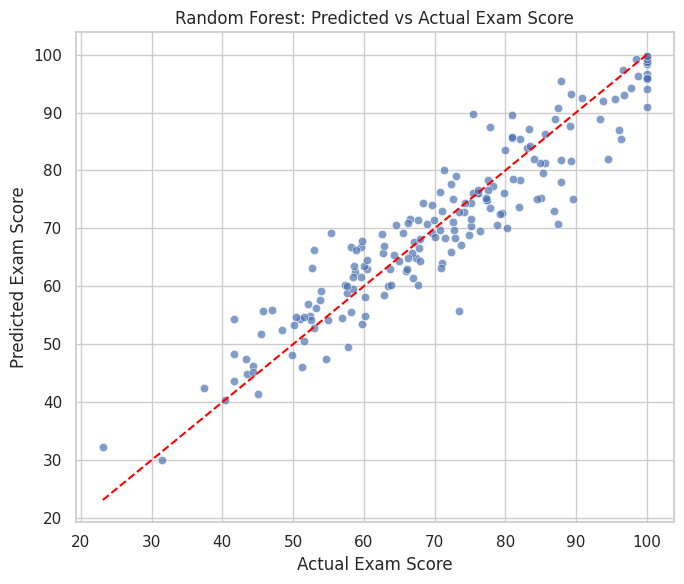

In [52]:
sns.set(style="whitegrid", palette="deep")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=rf_pred, alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linestyle='--'
)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Random Forest: Predicted vs Actual Exam Score")
plt.tight_layout()
plt.show()


### Interpretation: Random Forest – Predicted vs Actual Exam Scores

This scatterplot compares the actual exam scores with the predictions made by the Random Forest model. The red dashed line represents perfect prediction (where predicted = actual).

Most points lie close to the diagonal line, indicating that the model makes accurate predictions for the majority of students. Some dispersion is visible, especially at the lower and higher ends, but overall the predictions are reliable and consistent with observed scores.

Compared to the linear regression model, this plot shows slightly more variance but still demonstrates strong performance and generalization.




---





We are now drawing a barplot that displays the importance of each feature as determined by the Random Forest model. The values reflect how much each feature contributes to reducing prediction error across the ensemble of decision trees.




<ipython-input-51-e2185db2f5d4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


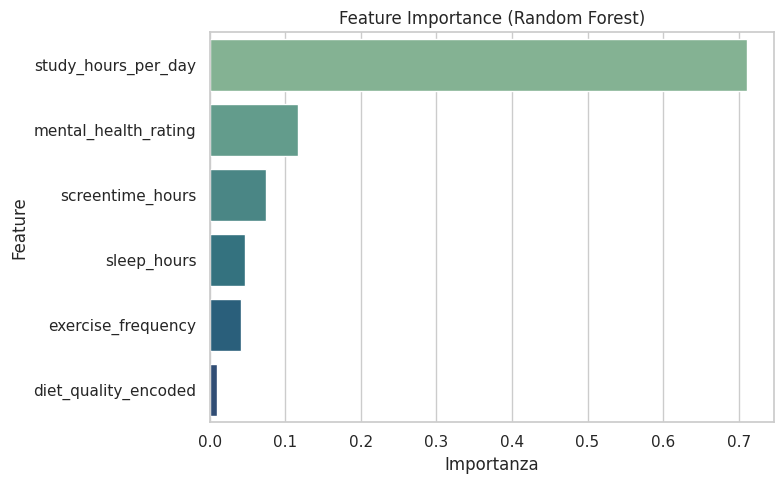

In [51]:
sns.set(style="whitegrid", palette="deep")
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=rf_importance,
    palette='crest'
)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importanza")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Interpretation: Feature Importance (Random Forest)

This bar chart displays the relative importance of each feature in the Random Forest model. The most influential feature by far is `study_hours_per_day`, which dominates the model with over 70% importance. This reinforces the strong linear and non-linear relationship between study time and academic performance.

Other features like `mental_health_rating` and `screentime_hours` contribute moderately, while `sleep_hours`, `exercise_frequency`, and `diet_quality_encoded` have minimal impact on the model's predictions.

These results align with the linear regression findings, highlighting that while well-being factors play a role, study behavior is the most critical determinant of academic success.




---



## 🧾 Conclusion

This project explored the relationship between students' psychophysical well-being and their academic performance, using a dataset containing lifestyle habits and exam scores. Through data exploration, correlation analysis, and predictive modeling, several insights emerged.

The strongest and most consistent predictor of exam performance was the number of study hours per day, significantly outweighing all other factors. Mental health showed a moderate positive correlation with exam scores, suggesting that emotional well-being plays a meaningful role in academic success. On the other hand, screentime was negatively associated with performance, reinforcing concerns about excessive screen exposure.

Other lifestyle variables, such as sleep hours, exercise frequency, and diet quality, showed weak or inconsistent relationships with exam results. While they may still contribute indirectly to cognitive functioning and long-term well-being, their short-term impact on academic outcomes appears limited within this dataset.

Both linear regression and random forest models performed well (R² ≈ 0.89), confirming the reliability of the selected features. However, the linear model was slightly more accurate and interpretable.

### 🔍 Key Takeaways:
- **Studying remains the strongest driver** of academic achievement.
- **Mental health and screentime** are important secondary factors.
- **Lifestyle habits** like sleep, exercise, and diet may support—but not guarantee—better performance.

This analysis suggests that promoting effective study habits and supporting students' mental well-being can have the most direct and measurable impact on academic success.
